In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Must import comet before torch, sometimes throws error otherwise.
from img_wang.callbacks import CometCallbackWithGrads
from fastai2.vision.all import show_image, show_images
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
import torch
import torch.nn as nn
import torch.nn.functional as F

from htools import *
from img_wang.data import load_img, get_databunch
from img_wang.models import Encoder, SingleInputBinaryModel, \
    TorchvisionEncoder
from img_wang.utils import gpu_setup
from incendio.callbacks import MetricHistory, ModelCheckpoint, EarlyStopper
from incendio.core import Trainer
from incendio.metrics import mean_soft_prediction, std_soft_prediction, percent_positive

/opt/conda/envs/fastai/lib/python3.7/site-packages/incendio/callbacks.py:25: UserWarning: Accio not available.
  warnings.warn('Accio not available.')


In [3]:
cd_root()
gpu_setup()

Current directory: /storage/img-wang
Setting seeds for reproducible training.


## V0

In [4]:
dst, dsv, dlt, dlv = get_databunch('data/imagewang-160/unsup/', 
                                   mode='patchwork', bs=64, pct_pos=.5, 
                                   max_train_len=None, max_val_len=None, 
                                   debug_mode=None)

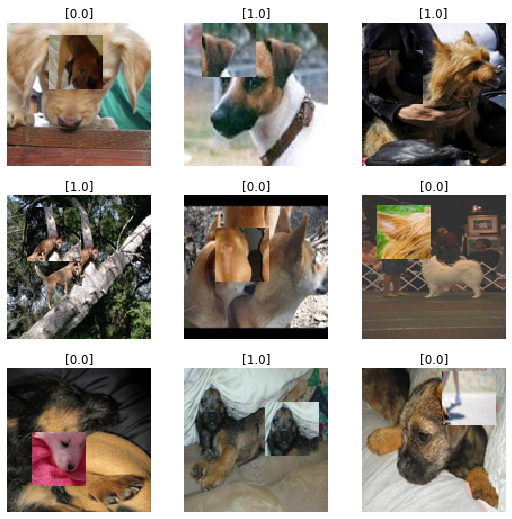

In [6]:
xb, yb = next(iter(dlt))
show_images(xb[:9], nrows=3, titles=yb[:9].tolist())

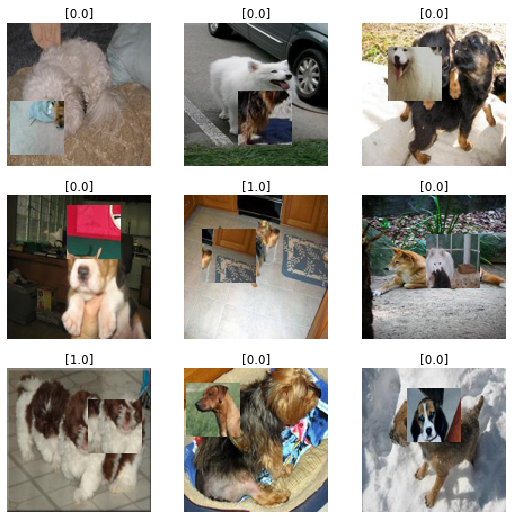

In [7]:
xv, yv = next(iter(dlv))
show_images(xv[:9], nrows=3, titles=yv[:9].tolist())

In [15]:
net = SingleInputBinaryModel(TorchvisionEncoder(), 
                             nn.Linear(2560, 1))

2020-09-11 04:13:06,211 [INFO]: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 0.001
    lr: 1e-05
    weight_decay: 0

Parameter Group 1
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 0.001
    lr: 0.0001
    weight_decay: 0

Parameter Group 2
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 0.001
    lr: 0.0001
    weight_decay: 0
)


COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/hdmamin/img-wang/ddb7d385e364486b993f3a95cb823b49
COMET INFO:   Metrics:
COMET INFO:     loss : 0.858071506023407
COMET INFO:   Parameters:
COMET INFO:     _stop_training : 1
COMET INFO:     epochs         : 50
COMET INFO:     eps            : 0.001
COMET INFO:     lr_mult        : 1.0
COMET INFO:     lrs            : [1e-05, 0.0001, 0.0001]
COMET INFO:     mode           : binary
COMET INFO:     out_dir        : data/models/v0
COMET INFO:     thresh         : 0.5
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (1 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     os packages      



=====

Epoch 0

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.6669 |       0.5997 |
| mean_soft_prediction |  0.4868 |       0.5061 |
| percent_positive     |  0.4812 |       0.5078 |


Saving model. Loss improved from inf to 0.5997.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 1

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.5375 |       0.5122 |
| mean_soft_prediction |  0.4882 |       0.5237 |
| percent_positive     |  0.4835 |       0.5352 |


Saving model. Loss improved from 0.5997 to 0.5122.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 2

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.4573 |       0.4389 |
| mean_soft_prediction |  0.5013 |       0.5290 |
| percent_positive     |  0.5104 |       0.5521 |


Saving model. Loss improved from 0.5122 to 0.4389.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 3

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.4158 |       0.3951 |
| mean_soft_prediction |  0.4798 |       0.5137 |
| percent_positive     |  0.4787 |       0.5352 |


Saving model. Loss improved from 0.4389 to 0.3951.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 4

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3898 |       0.3480 |
| mean_soft_prediction |  0.4896 |       0.4847 |
| percent_positive     |  0.4970 |       0.4974 |


Saving model. Loss improved from 0.3951 to 0.3480.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 5

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3547 |       0.3562 |
| mean_soft_prediction |  0.4993 |       0.5337 |
| percent_positive     |  0.5067 |       0.5326 |





=====

Epoch 6

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3506 |       0.3289 |
| mean_soft_prediction |  0.5072 |       0.4813 |
| percent_positive     |  0.5172 |       0.4805 |


Saving model. Loss improved from 0.3480 to 0.3289.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 7

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3377 |       0.2821 |
| mean_soft_prediction |  0.4958 |       0.5240 |
| percent_positive     |  0.5039 |       0.5299 |


Saving model. Loss improved from 0.3289 to 0.2821.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 8

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2934 |       0.3202 |
| mean_soft_prediction |  0.5067 |       0.5236 |
| percent_positive     |  0.5168 |       0.5352 |





=====

Epoch 9

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3000 |       0.3134 |
| mean_soft_prediction |  0.4969 |       0.4894 |
| percent_positive     |  0.5082 |       0.4922 |





=====

Epoch 10

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2769 |       0.3177 |
| mean_soft_prediction |  0.4966 |       0.4902 |
| percent_positive     |  0.5067 |       0.5013 |





=====

Epoch 11

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2678 |       0.2828 |
| mean_soft_prediction |  0.5069 |       0.5015 |
| percent_positive     |  0.5159 |       0.4974 |





=====

Epoch 12

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2595 |       0.2803 |
| mean_soft_prediction |  0.5041 |       0.5186 |
| percent_positive     |  0.5097 |       0.5299 |


Saving model. Loss improved from 0.2821 to 0.2803.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 13

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2604 |       0.2811 |
| mean_soft_prediction |  0.5000 |       0.4873 |
| percent_positive     |  0.5067 |       0.4948 |





=====

Epoch 14

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2487 |       0.2456 |
| mean_soft_prediction |  0.5011 |       0.5265 |
| percent_positive     |  0.5120 |       0.5286 |


Saving model. Loss improved from 0.2803 to 0.2456.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 15

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2432 |       0.2532 |
| mean_soft_prediction |  0.5072 |       0.5295 |
| percent_positive     |  0.5142 |       0.5339 |





=====

Epoch 16

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2338 |       0.2425 |
| mean_soft_prediction |  0.5043 |       0.5040 |
| percent_positive     |  0.5111 |       0.5078 |


Saving model. Loss improved from 0.2456 to 0.2425.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 17

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2274 |       0.2636 |
| mean_soft_prediction |  0.4861 |       0.4982 |
| percent_positive     |  0.4948 |       0.5065 |





=====

Epoch 18

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2337 |       0.1905 |
| mean_soft_prediction |  0.4981 |       0.5101 |
| percent_positive     |  0.5048 |       0.5104 |


Saving model. Loss improved from 0.2425 to 0.1905.
Writing data to data/models/v0/best_val_metrics.json.




=====

Epoch 19

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2234 |       0.2167 |
| mean_soft_prediction |  0.4880 |       0.5188 |
| percent_positive     |  0.4975 |       0.5156 |





=====

Epoch 20

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2371 |       0.2070 |
| mean_soft_prediction |  0.5098 |       0.4998 |
| percent_positive     |  0.5181 |       0.5013 |





=====

Epoch 21

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2255 |       0.2288 |
| mean_soft_prediction |  0.4973 |       0.5321 |
| percent_positive     |  0.5039 |       0.5391 |





=====

Epoch 22

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2115 |       0.2385 |
| mean_soft_prediction |  0.4995 |       0.4986 |
| percent_positive     |  0.5058 |       0.5091 |





=====

Epoch 23

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2087 |       0.2091 |
| mean_soft_prediction |  0.4922 |       0.4900 |
| percent_positive     |  0.4999 |       0.5039 |





=====

Epoch 24

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2120 |       0.2439 |
| mean_soft_prediction |  0.4860 |       0.4711 |
| percent_positive     |  0.4932 |       0.4805 |


EarlyStopper halting training: validation loss has not improved enough in 6 epochs.

Training complete. Model in eval mode.


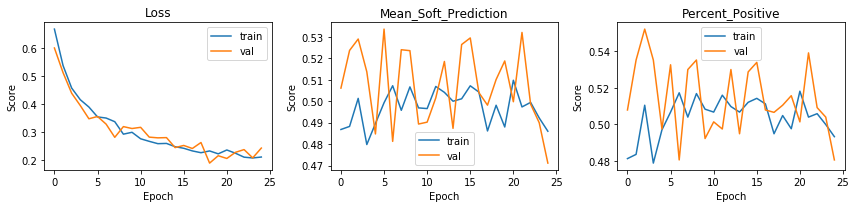

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/hdmamin/img-wang/b3e9a8f7ff5d476ab0c70d2d1876bf98
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [270]                      : (0.09041792899370193, 0.8469772338867188)
COMET INFO:     train_loss [25]                 : (0.20871544988067062, 0.6668792019287745)
COMET INFO:     train_mean_soft_prediction [25] : (0.4797929682665401, 0.5097881022978712)
COMET INFO:     train_percent_positive [25]     : (0.4787326388888889, 0.5180844907407407)
COMET INFO:     val_loss [25]                   : (0.19046316792567572, 0.599692369500796)
COMET INFO:     val_mean_soft_prediction [25]   : (0.4711315929889679, 0.5336628456910452)
COMET INFO:     val_percent_positive [25]       : (0.48046875, 0.5520833333333334)
COMET INFO:   Parameters:
COMET IN

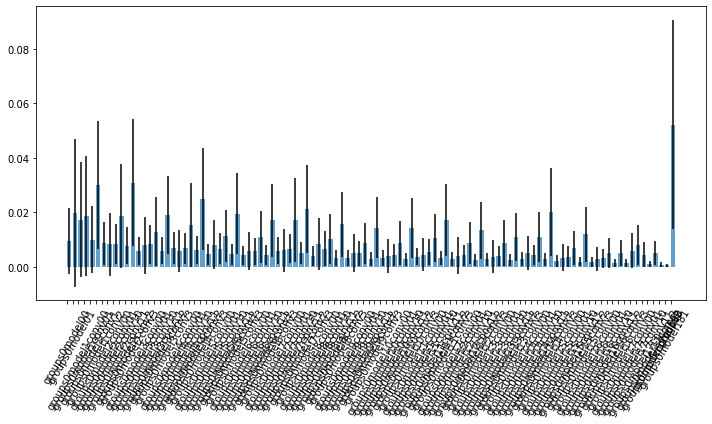

In [16]:
t = Trainer(net, dst, dsv, dlt, dlv, F.binary_cross_entropy_with_logits,
            mode='binary', out_dir='data/models/v0', last_act=torch.sigmoid,
            callbacks=[MetricHistory(None, None),
                       CometCallbackWithGrads('img_wang'),
                       ModelCheckpoint(),
                       EarlyStopper('loss', 'min', patience=5)],
            metrics=[mean_soft_prediction, percent_positive])
t.fit(50, [1e-5, 1e-4, 1e-4])

In [23]:
preds = t.predict(xb, logits=False)

In [35]:
yb[0].item()

0.0

In [38]:
titles = [f'Label: {y.item()}\nPred: {yhat.item():.3f}' 
          for y, yhat in zip(yb, preds)]

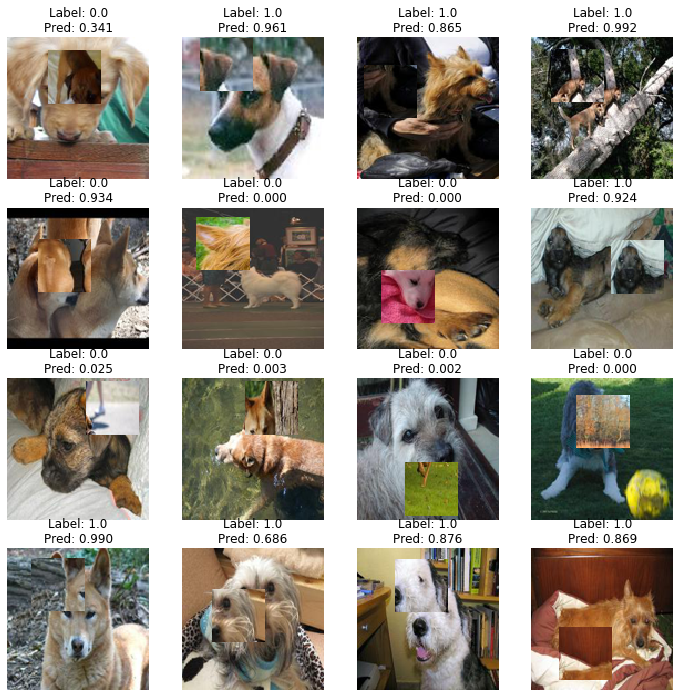

In [39]:
show_images(xb[:16], nrows=4, titles=titles[:16])

In [54]:
df = pd.DataFrame({'y': yb.squeeze(-1).numpy(), 
                   'y_proba': preds.squeeze(-1).cpu().numpy()})
df.ends()

,y,y_proba
0,0.0,0.340635
1,1.0,0.961424
2,1.0,0.865085
61,1.0,0.994761
62,1.0,0.783265
63,1.0,0.790105


In [57]:
sorted_mistakes = df.lambda_sort(lambda x: abs(x.y - x.y_proba), ascending=False)
sorted_mistakes.head(5)

,y,y_proba
4,0.0,0.934226
36,1.0,0.281552
59,1.0,0.353781
55,1.0,0.551003
33,1.0,0.582675


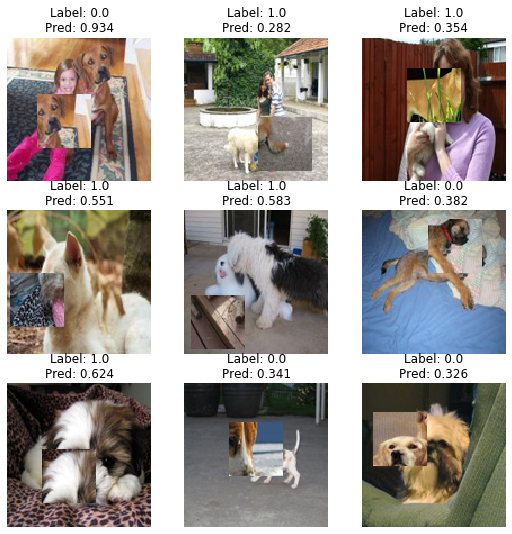

In [67]:
idx = sorted_mistakes.index.values
show_images([dst[i][0] for i in idx[:9]],
            nrows=3,
            titles=[titles[i] for i in idx[:9]])

### Notes

Looked at predictions on a single train batch. Possible error in dataset? Looks like the third image plotted above is labeled as a positive but it looks like a negative. Investigate.

## V1

Larger batch size and add std_soft_predictions as a metric.

In [4]:
dst, dsv, dlt, dlv = get_databunch('data/imagewang-160/unsup/', 
                                   mode='patchwork', bs=512, pct_pos=.5, 
                                   max_train_len=None, max_val_len=None, 
                                   debug_mode=None)

In [7]:
net = SingleInputBinaryModel(TorchvisionEncoder(), 
                             nn.Linear(2560, 1))

2020-09-12 05:24:41,559 [INFO]: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 0.001
    lr: 1e-05
    weight_decay: 0

Parameter Group 1
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 0.001
    lr: 0.0001
    weight_decay: 0

Parameter Group 2
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 0.001
    lr: 0.0001
    weight_decay: 0
)


COMET INFO: old comet version (3.1.16) detected. current: 3.2.0 please update your comet lib with command: `pip install --no-cache-dir --upgrade comet_ml`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/hdmamin/img-wang/666ff0553ae14eaaa10dd5a0c91d37b1





=====

Epoch 0

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.7227 |       0.6885 |
| mean_soft_prediction |  0.4731 |       0.4972 |
| std_soft_prediction  |  0.1314 |       0.1199 |
| percent_positive     |  0.4175 |       0.5045 |


Saving model. Loss improved from inf to 0.6885.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 1

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.6766 |       0.6391 |
| mean_soft_prediction |  0.5046 |       0.5075 |
| std_soft_prediction  |  0.1306 |       0.1358 |
| percent_positive     |  0.5201 |       0.5368 |


Saving model. Loss improved from 0.6885 to 0.6391.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 2

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.6352 |       0.6481 |
| mean_soft_prediction |  0.4766 |       0.5402 |
| std_soft_prediction  |  0.1389 |       0.1454 |
| percent_positive     |  0.4408 |       0.6142 |





=====

Epoch 3

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.6130 |       0.5879 |
| mean_soft_prediction |  0.4777 |       0.4673 |
| std_soft_prediction  |  0.1562 |       0.1674 |
| percent_positive     |  0.4480 |       0.4400 |


Saving model. Loss improved from 0.6391 to 0.5879.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 4

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.5840 |       0.5721 |
| mean_soft_prediction |  0.4878 |       0.4926 |
| std_soft_prediction  |  0.1729 |       0.1826 |
| percent_positive     |  0.4799 |       0.5032 |


Saving model. Loss improved from 0.5879 to 0.5721.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 5

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.5649 |       0.5587 |
| mean_soft_prediction |  0.4814 |       0.5228 |
| std_soft_prediction  |  0.1945 |       0.1971 |
| percent_positive     |  0.4630 |       0.5419 |


Saving model. Loss improved from 0.5721 to 0.5587.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 6

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.5334 |       0.5179 |
| mean_soft_prediction |  0.4959 |       0.5141 |
| std_soft_prediction  |  0.2159 |       0.2264 |
| percent_positive     |  0.4985 |       0.5342 |


Saving model. Loss improved from 0.5587 to 0.5179.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 7

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.5129 |       0.5088 |
| mean_soft_prediction |  0.4877 |       0.4932 |
| std_soft_prediction  |  0.2370 |       0.2500 |
| percent_positive     |  0.4827 |       0.4735 |


Saving model. Loss improved from 0.5179 to 0.5088.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 8

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.4911 |       0.4745 |
| mean_soft_prediction |  0.4994 |       0.5193 |
| std_soft_prediction  |  0.2557 |       0.2637 |
| percent_positive     |  0.5098 |       0.5329 |


Saving model. Loss improved from 0.5088 to 0.4745.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 9

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.4707 |       0.4907 |
| mean_soft_prediction |  0.4953 |       0.5020 |
| std_soft_prediction  |  0.2736 |       0.2837 |
| percent_positive     |  0.5000 |       0.5045 |





=====

Epoch 10

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.4564 |       0.4905 |
| mean_soft_prediction |  0.4845 |       0.4933 |
| std_soft_prediction  |  0.2908 |       0.2993 |
| percent_positive     |  0.4769 |       0.4890 |





=====

Epoch 11

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.4422 |       0.4199 |
| mean_soft_prediction |  0.4966 |       0.5090 |
| std_soft_prediction  |  0.3049 |       0.3162 |
| percent_positive     |  0.5036 |       0.5019 |


Saving model. Loss improved from 0.4745 to 0.4199.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 12

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.4204 |       0.4180 |
| mean_soft_prediction |  0.5085 |       0.4869 |
| std_soft_prediction  |  0.3181 |       0.3188 |
| percent_positive     |  0.5174 |       0.4735 |


Saving model. Loss improved from 0.4199 to 0.4180.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 13

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.4149 |       0.4311 |
| mean_soft_prediction |  0.4941 |       0.4909 |
| std_soft_prediction  |  0.3265 |       0.3343 |
| percent_positive     |  0.4974 |       0.4852 |





=====

Epoch 14

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3987 |       0.3922 |
| mean_soft_prediction |  0.5017 |       0.5198 |
| std_soft_prediction  |  0.3351 |       0.3466 |
| percent_positive     |  0.5096 |       0.5226 |


Saving model. Loss improved from 0.4180 to 0.3922.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 15

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3988 |       0.4231 |
| mean_soft_prediction |  0.5001 |       0.5056 |
| std_soft_prediction  |  0.3431 |       0.3499 |
| percent_positive     |  0.5048 |       0.5135 |





=====

Epoch 16

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3843 |       0.4286 |
| mean_soft_prediction |  0.5032 |       0.4862 |
| std_soft_prediction  |  0.3491 |       0.3473 |
| percent_positive     |  0.5087 |       0.4916 |





=====

Epoch 17

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3717 |       0.3909 |
| mean_soft_prediction |  0.5037 |       0.4936 |
| std_soft_prediction  |  0.3556 |       0.3577 |
| percent_positive     |  0.5141 |       0.5006 |


Saving model. Loss improved from 0.3922 to 0.3909.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 18

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3772 |       0.3816 |
| mean_soft_prediction |  0.4807 |       0.5168 |
| std_soft_prediction  |  0.3602 |       0.3643 |
| percent_positive     |  0.4862 |       0.5097 |


Saving model. Loss improved from 0.3909 to 0.3816.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 19

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3540 |       0.3731 |
| mean_soft_prediction |  0.5036 |       0.4821 |
| std_soft_prediction  |  0.3643 |       0.3651 |
| percent_positive     |  0.5116 |       0.4942 |


Saving model. Loss improved from 0.3816 to 0.3731.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 20

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3584 |       0.3927 |
| mean_soft_prediction |  0.4846 |       0.5339 |
| std_soft_prediction  |  0.3681 |       0.3683 |
| percent_positive     |  0.4940 |       0.5406 |





=====

Epoch 21

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3537 |       0.3537 |
| mean_soft_prediction |  0.5113 |       0.5043 |
| std_soft_prediction  |  0.3704 |       0.3782 |
| percent_positive     |  0.5230 |       0.5110 |


Saving model. Loss improved from 0.3731 to 0.3537.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 22

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3352 |       0.3262 |
| mean_soft_prediction |  0.4937 |       0.5026 |
| std_soft_prediction  |  0.3726 |       0.3810 |
| percent_positive     |  0.4983 |       0.4968 |


Saving model. Loss improved from 0.3537 to 0.3262.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 23

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3455 |       0.3418 |
| mean_soft_prediction |  0.5057 |       0.4839 |
| std_soft_prediction  |  0.3762 |       0.3809 |
| percent_positive     |  0.5119 |       0.4826 |





=====

Epoch 24

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3368 |       0.3727 |
| mean_soft_prediction |  0.4871 |       0.4936 |
| std_soft_prediction  |  0.3778 |       0.3774 |
| percent_positive     |  0.4902 |       0.4981 |





=====

Epoch 25

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3312 |       0.3522 |
| mean_soft_prediction |  0.4788 |       0.4770 |
| std_soft_prediction  |  0.3800 |       0.3807 |
| percent_positive     |  0.4847 |       0.4826 |





=====

Epoch 26

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3323 |       0.3431 |
| mean_soft_prediction |  0.4934 |       0.5090 |
| std_soft_prediction  |  0.3829 |       0.3784 |
| percent_positive     |  0.4998 |       0.5381 |





=====

Epoch 27

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2992 |       0.3149 |
| mean_soft_prediction |  0.5023 |       0.4869 |
| std_soft_prediction  |  0.3865 |       0.3878 |
| percent_positive     |  0.5132 |       0.4994 |


Saving model. Loss improved from 0.3262 to 0.3149.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 28

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3151 |       0.3428 |
| mean_soft_prediction |  0.5027 |       0.4748 |
| std_soft_prediction  |  0.3880 |       0.3890 |
| percent_positive     |  0.5096 |       0.4800 |





=====

Epoch 29

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3194 |       0.3331 |
| mean_soft_prediction |  0.5021 |       0.4820 |
| std_soft_prediction  |  0.3906 |       0.3944 |
| percent_positive     |  0.5095 |       0.4955 |





=====

Epoch 30

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3086 |       0.3246 |
| mean_soft_prediction |  0.4900 |       0.4592 |
| std_soft_prediction  |  0.3914 |       0.3911 |
| percent_positive     |  0.4992 |       0.4671 |





=====

Epoch 31

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3049 |       0.3460 |
| mean_soft_prediction |  0.4983 |       0.4710 |
| std_soft_prediction  |  0.3923 |       0.3951 |
| percent_positive     |  0.5060 |       0.4800 |





=====

Epoch 32

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.3102 |       0.3137 |
| mean_soft_prediction |  0.5035 |       0.4996 |
| std_soft_prediction  |  0.3941 |       0.3966 |
| percent_positive     |  0.5110 |       0.5071 |


Saving model. Loss improved from 0.3149 to 0.3137.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 33

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2908 |       0.3290 |
| mean_soft_prediction |  0.5030 |       0.4815 |
| std_soft_prediction  |  0.3969 |       0.4022 |
| percent_positive     |  0.5144 |       0.4942 |





=====

Epoch 34

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2849 |       0.2576 |
| mean_soft_prediction |  0.4984 |       0.4930 |
| std_soft_prediction  |  0.3962 |       0.4038 |
| percent_positive     |  0.5047 |       0.5006 |


Saving model. Loss improved from 0.3137 to 0.2576.
Writing data to data/models/v1/best_val_metrics.json.




=====

Epoch 35

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2966 |       0.2966 |
| mean_soft_prediction |  0.4879 |       0.4872 |
| std_soft_prediction  |  0.4011 |       0.4102 |
| percent_positive     |  0.4967 |       0.4994 |





=====

Epoch 36

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2815 |       0.3134 |
| mean_soft_prediction |  0.4992 |       0.5085 |
| std_soft_prediction  |  0.4049 |       0.3981 |
| percent_positive     |  0.5057 |       0.5200 |





=====

Epoch 37

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2791 |       0.3157 |
| mean_soft_prediction |  0.5013 |       0.5064 |
| std_soft_prediction  |  0.4026 |       0.4013 |
| percent_positive     |  0.5137 |       0.5200 |





=====

Epoch 38

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2804 |       0.2801 |
| mean_soft_prediction |  0.4965 |       0.4997 |
| std_soft_prediction  |  0.4051 |       0.4089 |
| percent_positive     |  0.5072 |       0.5058 |





=====

Epoch 39

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2683 |       0.2855 |
| mean_soft_prediction |  0.5182 |       0.4836 |
| std_soft_prediction  |  0.4060 |       0.4112 |
| percent_positive     |  0.5281 |       0.4994 |





=====

Epoch 40

| Metric               |   Train |   Validation |
|----------------------|---------|--------------|
| loss                 |  0.2688 |       0.2787 |
| mean_soft_prediction |  0.4861 |       0.4888 |
| std_soft_prediction  |  0.4057 |       0.4092 |
| percent_positive     |  0.4941 |       0.5019 |


EarlyStopper halting training: validation loss has not improved enough in 6 epochs.

Training complete. Model in eval mode.


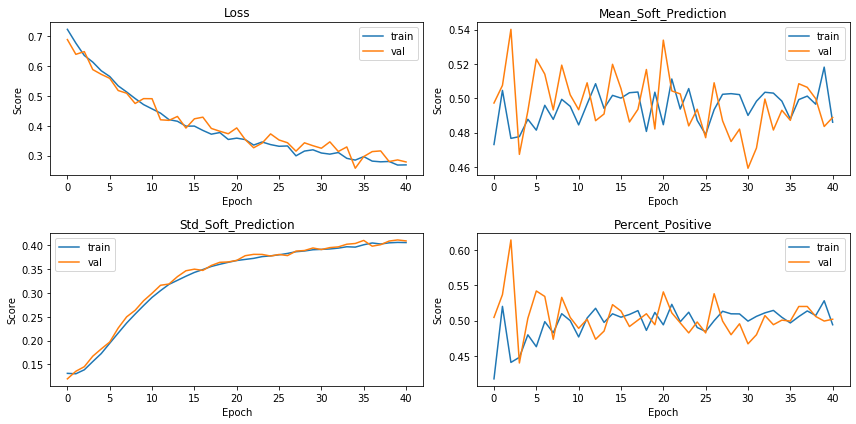

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/hdmamin/img-wang/666ff0553ae14eaaa10dd5a0c91d37b1
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [54]                       : (0.24368569254875183, 0.8502534031867981)
COMET INFO:     train_loss [41]                 : (0.26834842333426845, 0.7227101234289316)
COMET INFO:     train_mean_soft_prediction [41] : (0.4730553145592029, 0.5181694947756253)
COMET INFO:     train_percent_positive [41]     : (0.41751802884615385, 0.5280949519230769)
COMET INFO:     train_std_soft_prediction [41]  : (0.13055092268265212, 0.40604310769301194)
COMET INFO:     val_loss [41]                   : (0.2575946657888351, 0.6884917103090594)
COMET INFO:     val_mean_soft_prediction [41]   : (0.459208349450942, 0.5401970214228476)
COMET INFO:     val_perc

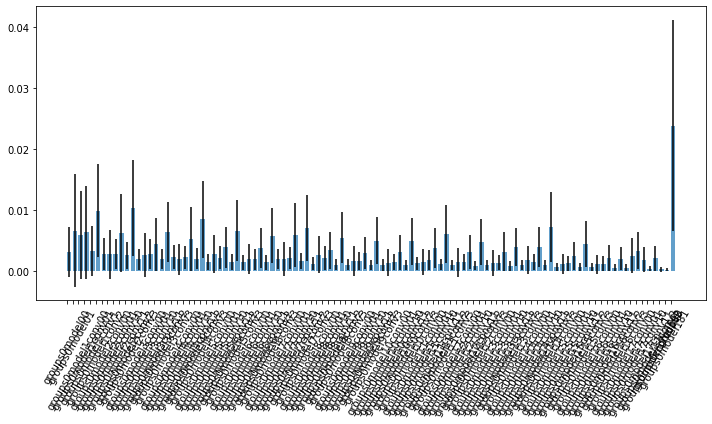

In [8]:
t = Trainer(net, dst, dsv, dlt, dlv, F.binary_cross_entropy_with_logits,
            mode='binary', out_dir='data/models/v1', last_act=torch.sigmoid,
            callbacks=[MetricHistory(None, None),
                       CometCallbackWithGrads('img_wang'),
                       ModelCheckpoint(),
                       EarlyStopper('loss', 'min', patience=5)],
            metrics=[mean_soft_prediction, std_soft_prediction, percent_positive])
t.fit(50, [1e-5, 1e-4, 1e-4])